In [1]:
#!pip install cv2
import os
import sys
import cv2
import time
import pickle
import numpy as np 
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, ShuffleSplit
from keras.utils import np_utils
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import time
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## generators to send image data to the sequential (cnn) model
#classes = ['A', 'C', 'M', 'N', 'S', 'T', 'V']
#classes = ['A', 'N', 'S', 'V']
classes = ['C', 'FA', 'M', 'S']


img_height,img_width = 128,128

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('500ms/training_set',
                                                    target_size=(img_height,img_width),
                                                    batch_size=20,
                                                    shuffle=False,
                                                    classes=classes,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('500ms/testing_set',
                                                  target_size=(img_height,img_width),
                                                  batch_size=20,
                                                  shuffle=False,
                                                  classes=classes,
                                                  class_mode='categorical')

hold_datagen = ImageDataGenerator(rescale=1./255)
hold_generator = hold_datagen.flow_from_directory('500ms/hold_out',
                                                  target_size=(img_height,img_width),
                                                  batch_size=20,
                                                  shuffle=False,
                                                  classes=classes,
                                                  class_mode='categorical')



Found 34556 images belonging to 4 classes.
Found 11520 images belonging to 4 classes.
Found 11520 images belonging to 4 classes.


In [3]:
num_category = 4

## model building
model = Sequential()

## please modify the model as per your requirements
model.add(Conv2D(16, kernel_size=(3, 7), activation='relu',
                 input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(3, 7)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(20, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(120, 3, activation='relu'))
model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(num_category, activation='softmax'))


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
monitor = [ EarlyStopping(monitor='val_loss',
                            min_delta=1e-3,
                            patience=5,
                            verbose=0,
                            mode='auto'),ModelCheckpoint(filepath="spec_500ms_mani_weights.h5",
                                   verbose=0,
                                   save_best_only=True)] # save best model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 122, 16)      1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 17, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 17, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 15, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 13, 20)        5780      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 4, 20)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 4, 20)         0         
__________

### Training model

In [5]:
## no of steps per epoch (total no. of images / batch size of imagedatagenerator)
train_steps = train_generator.n//train_generator.batch_size+1
test_steps = test_generator.n//test_generator.batch_size+1

train_generator.reset()
test_generator.reset()

tic=time.time()
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps,
                              epochs=25,callbacks= monitor,
                              validation_data=test_generator,
                              validation_steps=test_steps,
                              verbose=1)     
toc=time.time()
print(str(1000*(toc-tic))+"ms")

Epoch 1/25
1728/1728 [==============================] - 1104s 639ms/step - loss: 0.6565 - acc: 0.7252 - val_loss: 0.3091 - val_acc: 0.8755
Epoch 2/25
1728/1728 [==============================] - 2139s 1s/step - loss: 0.2225 - acc: 0.9191 - val_loss: 0.1928 - val_acc: 0.9269
Epoch 3/25
1728/1728 [==============================] - 1032s 597ms/step - loss: 0.1525 - acc: 0.9448 - val_loss: 0.1053 - val_acc: 0.9601
Epoch 4/25
1728/1728 [==============================] - 367s 213ms/step - loss: 0.1113 - acc: 0.9594 - val_loss: 0.0778 - val_acc: 0.9711
Epoch 5/25
1728/1728 [==============================] - 350s 202ms/step - loss: 0.0911 - acc: 0.9668 - val_loss: 0.0590 - val_acc: 0.9784TA: 3:48 - ETA: - ETA: 2s - loss: 0.0917 -  - ETA: 1s - loss: 0.0914 - acc: 
Epoch 6/25
1728/1728 [==============================] - 344s 199ms/step - loss: 0.0804 - acc: 0.9709 - val_loss: 0.0657 - val_acc: 0.978500 -
Epoch 7/25
1728/1728 [==============================] - 342s 198ms/step - loss: 0.0742 - acc

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111200). Check your callbacks.
  % delta_t_median)


1728/1728 [==============================] - 318s 184ms/step - loss: 0.0405 - acc: 0.9870 - val_loss: 0.0317 - val_acc: 0.9895s - loss: 0.0 - ETA: 2s - loss: 0.040
Epoch 20/25
1728/1728 [==============================] - 320s 185ms/step - loss: 0.0364 - acc: 0.9872 - val_loss: 0.0281 - val_acc: 0.9904
Epoch 21/25
1728/1728 [==============================] - 344s 199ms/step - loss: 0.0343 - acc: 0.9879 - val_loss: 0.0335 - val_acc: 0.9881 0.0346 - acc
Epoch 22/25
1728/1728 [==============================] - 950s 550ms/step - loss: 0.0360 - acc: 0.9882 - val_loss: 0.0311 - val_acc: 0.9893
Epoch 23/25
1728/1728 [==============================] - 2029s 1s/step - loss: 0.0342 - acc: 0.9878 - val_loss: 0.0324 - val_acc: 0.9889
Epoch 24/25
1728/1728 [==============================] - 1117s 646ms/step - loss: 0.0422 - acc: 0.9861 - val_loss: 0.0297 - val_acc: 0.9897
Epoch 25/25
1728/1728 [==============================] - 1510s 874ms/step - loss: 0.0296 - acc: 0.9900 - val_loss: 0.0342 - val_a

In [6]:
model.save('mani_spectrogrammodel_cnn_500ms.h5') # saving the model

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


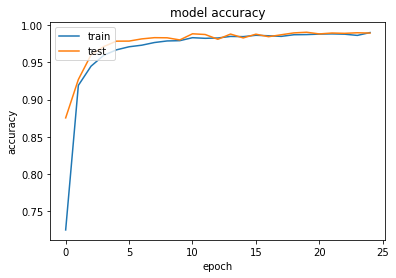

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("spec_500ms_acc.eps")
plt.savefig("spec_500ms_acc.png",dpi=150)
plt.show()


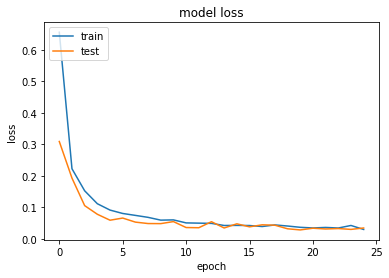

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("spec_500ms_loss.eps")
plt.savefig("spec_500ms_loss.png",dpi=150)
plt.show()


In [9]:
## to get confusion matrix for training_set
#test_generator.reset()
#test_steps = test_generator.n//test_generator.batch_size 

#y = np.ones((len(os.listdir('./500ms/hold_out/' + classes[0] + '/')),1))
#for i in range(1,num_category ):
    #y = np.vstack((y, np.ones((len(os.listdir('./500ms/hold_out/' + classes[i] + '/')),1))))

#y_pred = model.predict_generator(test_generator,
                                        #steps=test_steps,
                                        #verbose=1)
        #y_pred = np.argmax(y_pred, axis=1).astype('int8')
#print(y_pred)
#print(confusion_matrix(y, y_pred))
#print(classification_report(y, y_pred))
#print(accuracy_score(y, y_pred))
#skplt.metrics.plot_confusion_matrix(y, y_pred)
#plt.show()

## Testing

In [10]:
test_generator.reset()
test_steps = test_generator.n//test_generator.batch_size
y_test = model.predict_generator(test_generator,
                                        steps=test_steps,
                                        verbose=1)

576/576 [==============================] - 369s 640ms/step


In [11]:
y_test = np.argmax(y_test, axis=1).astype('int8')

In [12]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print(true_classes)
print(class_labels)

[0 0 0 ... 3 3 3]
['C', 'FA', 'M', 'S']


In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
report = metrics.classification_report(true_classes, y_test, target_names=class_labels)
print(report)   

             precision    recall  f1-score   support

          C       0.98      0.99      0.99      2880
         FA       1.00      1.00      1.00      2880
          M       0.99      0.99      0.99      2880
          S       0.99      0.97      0.98      2880

avg / total       0.99      0.99      0.99     11520



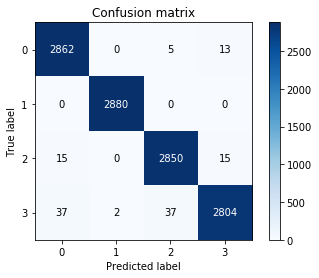

In [14]:
skplt.metrics.plot_confusion_matrix(true_classes, y_test,title='Confusion matrix')
plt.show()

In [15]:
Acc= accuracy_score(true_classes, y_test)
print('Accuracy Score:', Acc)

Accuracy Score: 0.9892361111111111


## Holdout Prediction

In [16]:
hold_generator.reset()
hold_steps = hold_generator.n//hold_generator.batch_size
tic=time.time()
y_holdout = model.predict_generator(hold_generator,
                                        steps=hold_steps,
                                        verbose=1)
tcc=time.time()
print(str(1000*(toc-tic))+"ms")
y_holdout = np.argmax(y_holdout, axis=1).astype('int8')



576/576 [==============================] - 248s 431ms/step
-370854.0327548981ms


[0 0 0 ... 3 3 3]
['C', 'FA', 'M', 'S']
             precision    recall  f1-score   support

          C       0.98      0.99      0.99      2880
         FA       1.00      1.00      1.00      2880
          M       0.98      0.99      0.99      2880
          S       0.99      0.97      0.98      2880

avg / total       0.99      0.99      0.99     11520



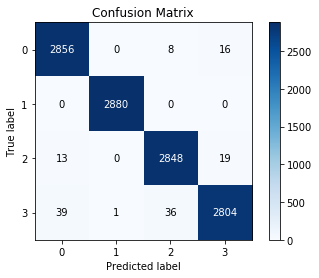

0.9892361111111111


In [17]:
true_classes1 = hold_generator.classes
class_labels1 = list(hold_generator.class_indices.keys())
print(true_classes1)
print(class_labels1)
report1 = metrics.classification_report(true_classes1, y_holdout, target_names=class_labels1)
print(report1)   
skplt.metrics.plot_confusion_matrix(true_classes1, y_holdout )
plt.show()
print(accuracy_score(true_classes, y_test))

### testing using evaluate genrerator

In [18]:
## to get confusion matrix for training_set
test_generator.reset()
test_steps = test_generator.n//test_generator.batch_size 
y = np.ones((len(os.listdir('./500ms/testing_set/' + classes[0] + '/')),1))
for i in range(1,num_category ):
    y = np.vstack((y, np.ones((len(os.listdir('./500ms/testing_set/' + classes[i] + '/')),1))))

test_loss, test_acc = model.evaluate_generator(test_generator,
                                        steps=test_steps,
                                        verbose=1)
print('test acc', test_acc)
print('test loss:', test_loss)

576/576 [==============================] - 312s 542ms/step
test acc 0.9892361090622015
test loss: 0.03428491618863553
